In [1]:
!pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print(tf.__version__)

2.8.0


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
np.set_printoptions(precision=3, suppress=True)

In [5]:
df = pd.read_csv('/content/GDP - GDP.csv')

In [6]:
df.head()

,GDP,Implied PPP Conversion Rate,Inflation,Import Volume,Export Volume,Population,Government Revenue,General Government Revenue,Currect Account Balance,Currect Account Balance.1
0,492.903,10.096,45.691,36.077,49.721,19.477,21.618,9.826,1.348,29.616
1,496.209,10.929,51.752,-1.088,-6.049,20.237,31.209,12.676,1.915,37.216
2,554.91,11.736,57.219,54.659,46.504,20.947,44.926,14.733,1.864,30.226
3,584.658,12.254,59.671,-2.541,-7.69,21.596,65.518,18.946,1.444,20.844
4,662.65,13.014,69.273,-9.417,-10.467,22.426,81.163,18.986,5.424,63.39


In [7]:
df.dtypes

GDP                             object
Implied PPP Conversion Rate     object
Inflation                      float64
Import Volume                   object
Export Volume                   object
Population                     float64
Government Revenue              object
General Government Revenue     float64
Currect Account Balance         object
Currect Account Balance.1       object
dtype: object

In [8]:
df.replace("--", np.nan, inplace=True)
df.dropna(axis=0, inplace=True)

In [9]:
for column in df.columns:
  df[column] = df[column].astype(float)

In [10]:
df.dtypes

GDP                            float64
Implied PPP Conversion Rate    float64
Inflation                      float64
Import Volume                  float64
Export Volume                  float64
Population                     float64
Government Revenue             float64
General Government Revenue     float64
Currect Account Balance        float64
Currect Account Balance.1      float64
dtype: object

In [12]:
traindataset = df.sample(frac=0.8, random_state=32)
testdataset = df.drop(traindataset.index)

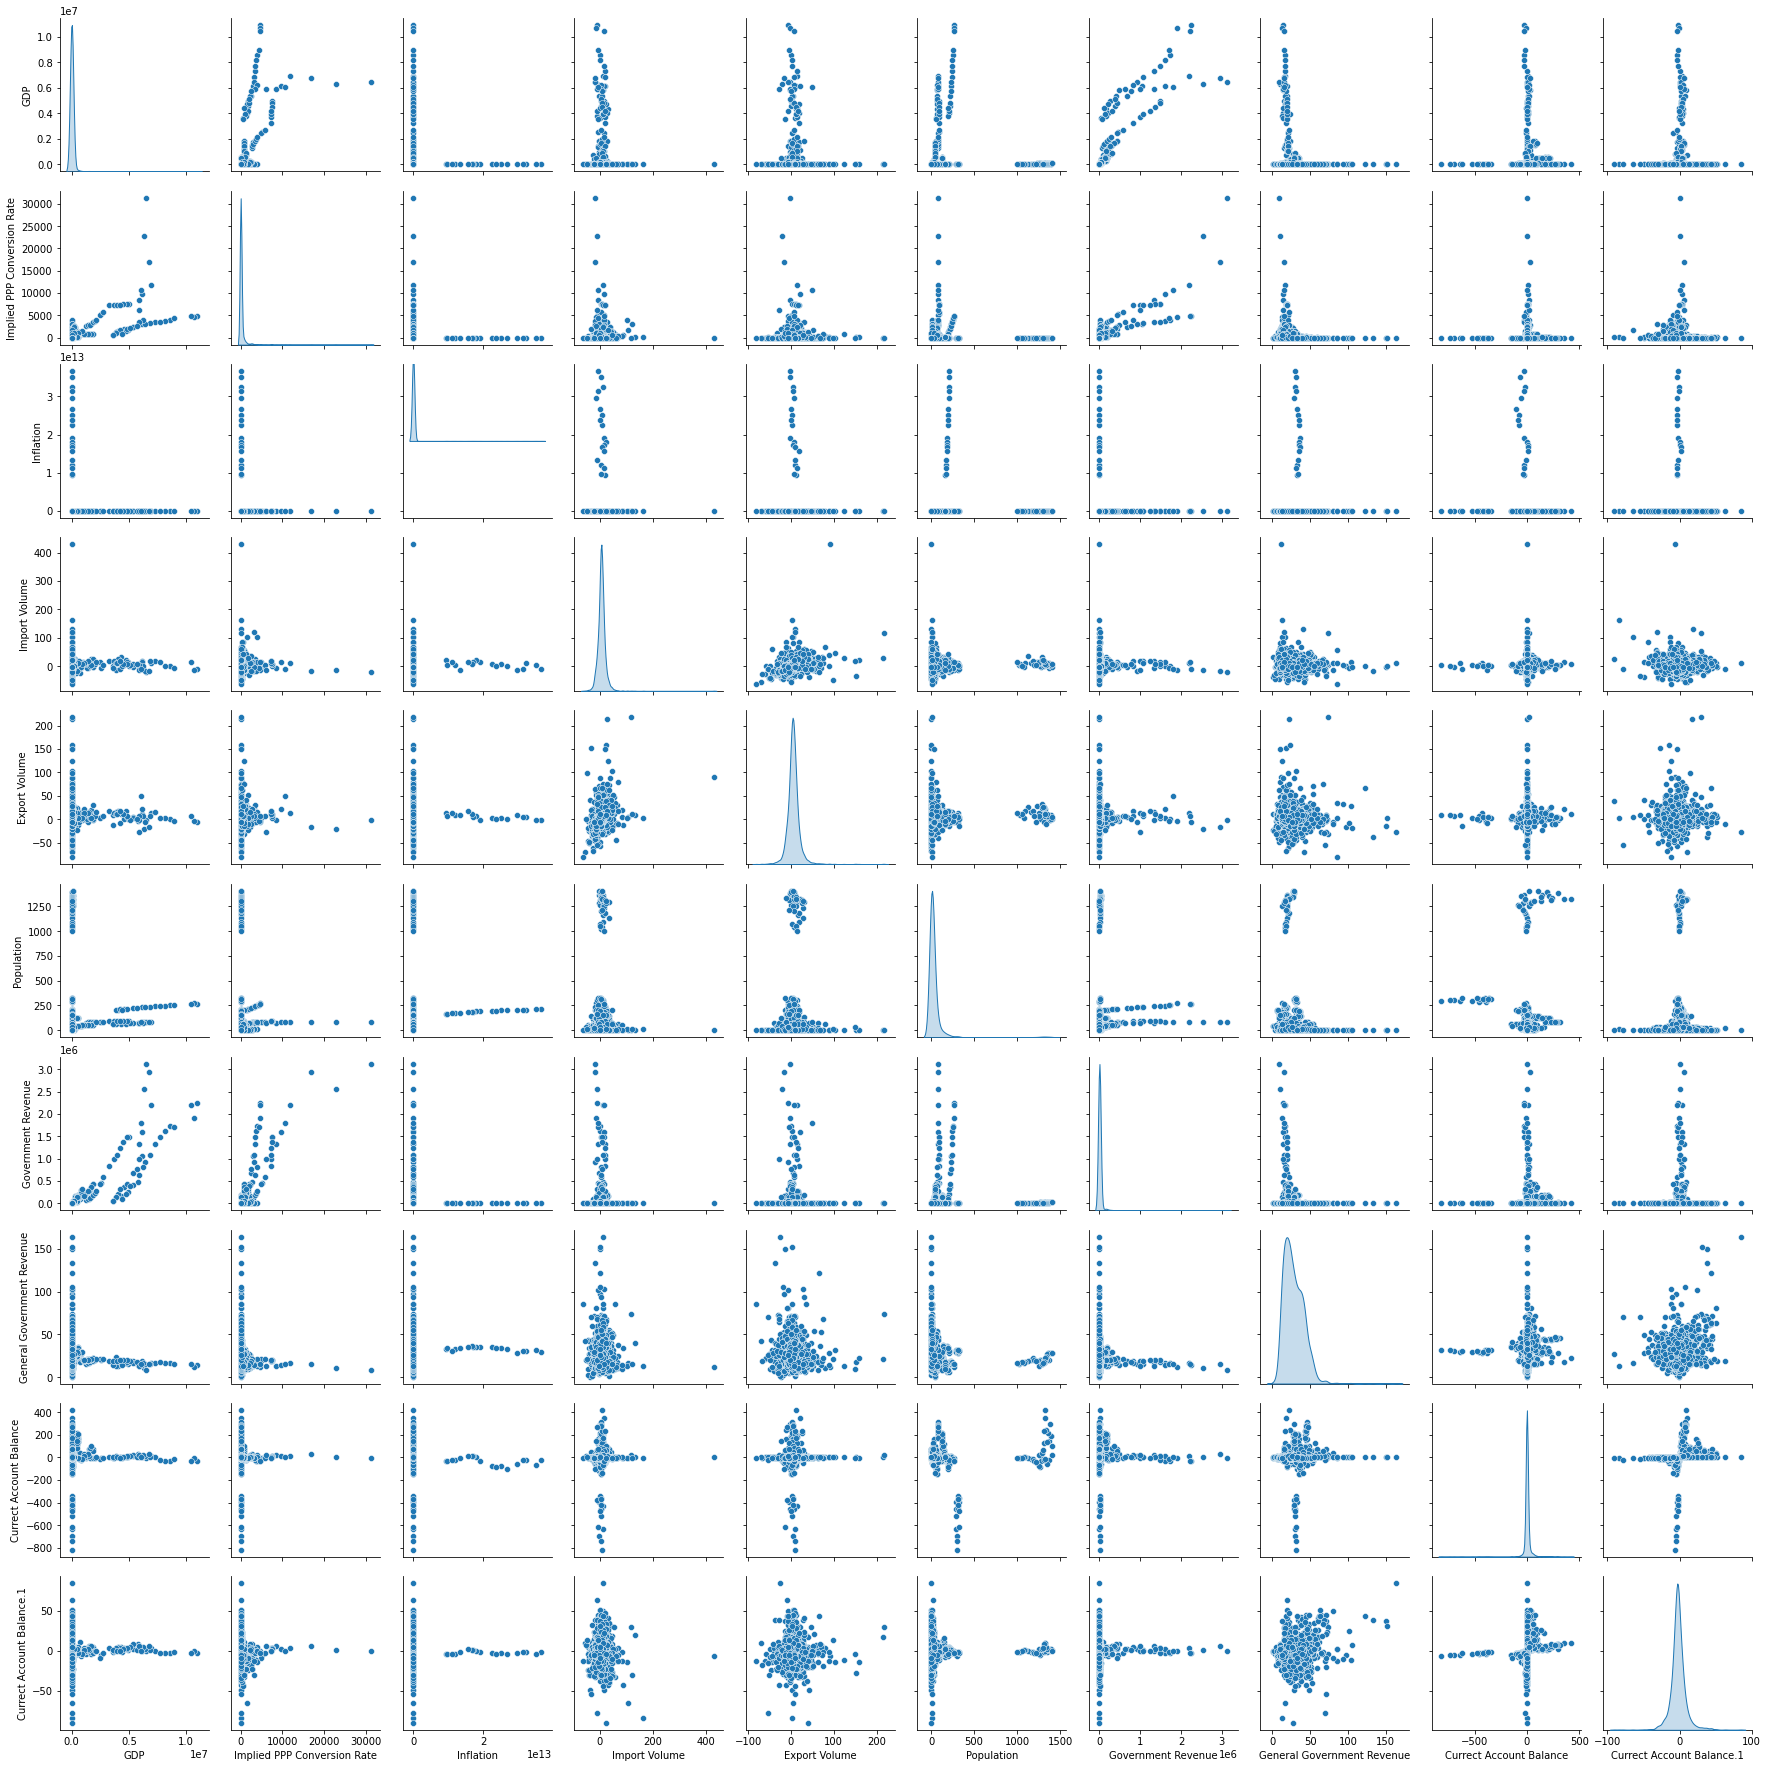

In [13]:
sns.pairplot(traindataset, diag_kind='kde')

In [15]:
traindataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GDP,3186.0,1.119650e+05,7.413212e+05,0.066,48.77475,668.2530,4704.97275,1.094904e+07
Implied PPP Conversion Rate,3186.0,2.156212e+02,1.029458e+03,0.001,0.89150,5.0110,83.39650,3.131988e+04
Inflation,3186.0,1.272968e+11,1.771169e+12,0.119,75.76000,98.2995,120.63525,3.664008e+13
Import Volume,3186.0,5.483901e+00,1.618284e+01,-61.750,-1.42575,5.0530,11.61200,4.293920e+02
Export Volume,3186.0,4.945093e+00,1.529081e+01,-80.952,-1.51875,4.2765,10.39275,2.174600e+02
Population,3186.0,3.838607e+01,1.397745e+02,0.017,2.71150,8.0845,25.79300,1.410080e+03
Government Revenue,3186.0,2.124776e+04,1.620771e+05,0.015,14.11875,158.3920,1179.89925,3.126611e+06
General Government Revenue,3186.0,2.822135e+01,1.365694e+01,0.799,17.86100,25.8555,36.83975,1.640540e+02
Currect Account Balance,3186.0,9.089275e-01,4.883482e+01,-816.647,-1.48375,-0.2430,0.63300,4.205690e+02
Currect Account Balance.1,3186.0,-2.389357e+00,1.070099e+01,-90.323,-6.99100,-2.8025,1.82300,8.484900e+01


In [16]:
train_features = traindataset.copy()
test_features = testdataset.copy()

train_labels = train_features.pop('GDP')
test_labels = test_features.pop('GDP')

In [17]:
traindataset.describe().transpose()[['mean','std']]

,mean,std
GDP,1.119650e+05,7.413212e+05
Implied PPP Conversion Rate,2.156212e+02,1.029458e+03
Inflation,1.272968e+11,1.771169e+12
Import Volume,5.483901e+00,1.618284e+01
Export Volume,4.945093e+00,1.529081e+01
Population,3.838607e+01,1.397745e+02
Government Revenue,2.124776e+04,1.620771e+05
General Government Revenue,2.822135e+01,1.365694e+01
Currect Account Balance,9.089275e-01,4.883482e+01
Currect Account Balance.1,-2.389357e+00,1.070099e+01


In [18]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [19]:
normalizer.adapt(np.array(train_features))

In [20]:
print(normalizer.mean.numpy())

[[ 2.156e+02  1.273e+11  5.484e+00  4.945e+00  3.839e+01  2.125e+04
   2.822e+01  9.089e-01 -2.389e+00]]


In [21]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  1361.99     11.8      31.96     11.19     66.3  164600.3      16.
       5.89      4.56]]

Normalized: [[ 1.11 -0.07  1.64  0.41  0.2   0.88 -0.89  0.1   0.65]]


In [22]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [23]:
linear_model.predict(train_features[:10])

array([[-0.502],
       [-0.013],
       [-0.071],
       [ 0.386],
       [-0.881],
       [ 0.085],
       [ 0.198],
       [-0.252],
       [ 0.389],
       [ 0.495]], dtype=float32)

In [24]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [26]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
80/80 [==============================] - 0s 4ms/step - loss: 119098.7500 - val_loss: 82502.0156
Epoch 2/100
80/80 [==============================] - 0s 4ms/step - loss: 119094.6562 - val_loss: 82498.4453
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 119090.5781 - val_loss: 82494.9844
Epoch 4/100
80/80 [==============================] - 0s 4ms/step - loss: 119086.5156 - val_loss: 82491.4141
Epoch 5/100
80/80 [==============================] - 0s 4ms/step - loss: 119082.4453 - val_loss: 82488.0078
Epoch 6/100
80/80 [==============================] - 0s 4ms/step - loss: 119078.4297 - val_loss: 82484.4766
Epoch 7/100
80/80 [==============================] - 0s 4ms/step - loss: 119074.4141 - val_loss: 82481.0469
Epoch 8/100
80/80 [==============================] - 0s 4ms/step - loss: 119070.4297 - val_loss: 82477.5234
Epoch 9/100
80/80 [==============================] - 0s 4ms/step - loss: 119066.4766 - val_loss: 82474.0234
Epoch 10/100
80/80 [========

In [28]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [29]:
gdp_model = build_and_compile_model(normalizer)

In [30]:
gdp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 512)               5120      
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                      

In [34]:
%%time
history = gdp_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=100)

Epoch 1/100
80/80 [==============================] - 1s 7ms/step - loss: 9014895616.0000 - val_loss: 6109847552.0000
Epoch 2/100
80/80 [==============================] - 0s 6ms/step - loss: 8462623232.0000 - val_loss: 7078682624.0000
Epoch 3/100
80/80 [==============================] - 0s 6ms/step - loss: 11546700800.0000 - val_loss: 4898250240.0000
Epoch 4/100
80/80 [==============================] - 0s 5ms/step - loss: 17807601664.0000 - val_loss: 10664186880.0000
Epoch 5/100
80/80 [==============================] - 0s 6ms/step - loss: 22274207744.0000 - val_loss: 13459731456.0000
Epoch 6/100
80/80 [==============================] - 0s 6ms/step - loss: 8998228992.0000 - val_loss: 3545335808.0000
Epoch 7/100
80/80 [==============================] - 0s 6ms/step - loss: 7738342912.0000 - val_loss: 4026720512.0000
Epoch 8/100
80/80 [==============================] - 0s 6ms/step - loss: 7221976064.0000 - val_loss: 2682487808.0000
Epoch 9/100
80/80 [==============================] - 0s 5ms